## ニューロンの発火についての実装
- 引用："Training Spiking Neural Networks Using Lessons From Deep Learning". Proceedings of the IEEE, 111(9) September 2023.

In [19]:

import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

#### 様々なニューラルネットワークモデルとその特性

<img src='https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial2/2_1_neuronmodels.png?raw=true' width="100%">

#### 膜電位の導出

<img src='https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial2/2_4_RCmembrane.png?raw=true' width="60%">

- 導出した式を一定時間に拡張した式

$$U(t+\Delta t) = U(t) + \frac{\Delta t}{\tau}\big(-U(t) + RI_{\rm in}(t)\big)$$

In [20]:
def leaky_integrate_neuron(U, time_step=1e-3, I=0, R=5e7, C=1e-10):
    tau = R*C
    U = U + (time_step/tau)*(-U + I*R)
    return U

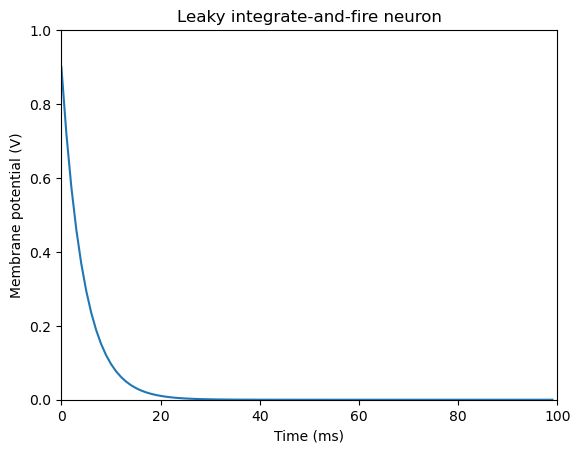

In [21]:
num_steps = 100
U = 0.9
U_trace = []  # keeps a record of U for plotting

for step in range(num_steps):
    U_trace.append(U)
    U = leaky_integrate_neuron(U)  # solve next step of U

plt.plot(U_trace)
plt.xlim(0, num_steps)
plt.ylim(0, 1)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (V)')
plt.title('Leaky integrate-and-fire neuron')
plt.show()


#### LapocqueニューロンモデルのSNNtorchでの実装

In [22]:
time_step = 1e-3
R = 5
C = 1e-3

# leaky integrate and fire neuron, tau=5e-3
lif1 = snn.Lapicque(R=R, C=C, time_step=time_step)

In [23]:
# Initialize membrane, input, and output
mem = torch.ones(1) * 0.9  # U=0.9 at t=0
cur_in = torch.zeros(num_steps)  # I=0 for all t 
spk_out = torch.zeros(1)  # initialize output spikes

In [24]:
# A list to store recordings of membrane potential
mem_rec = [mem]

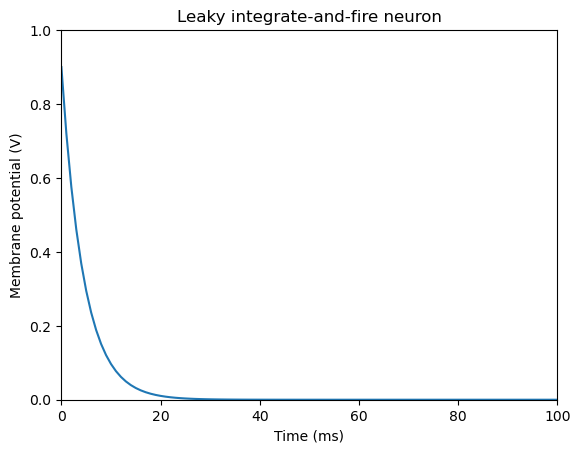

In [25]:
# pass updated value of mem and cur_in[step]=0 at every time step
for step in range(num_steps):
    spk_out, mem = lif1(cur_in[step], mem)

# Store recordings of membrane potential
    mem_rec.append(mem)

# crunch the list of tensors into one tensor
mem_rec = torch.stack(mem_rec)


plt.plot(mem_rec)
plt.xlim(0, num_steps)
plt.ylim(0, 1)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (V)')
plt.title('Leaky integrate-and-fire neuron')
plt.show()